In [3]:
import matplotlib as plt
import pandas as pd
import numpy as np
import bs4
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
def getSkils(host, url, sample_size, skills_key_words):
 skills = {}
 for key in skills_key_words:
   skills[key] = []
 titles = []
 company_names = []
 location_names = []
 job_descriptions = []
 job_ids = []
 for i in range(0,sample_size, 20):
   # html parsing Indeed job portal page
   my_url = url+str(i)
   uClient = uReq(my_url)
   page_html = uClient.read()
   uClient.close()
   page_soup = soup(page_html,'html.parser')
   # extract job_title
   jobs = page_soup.findAll("div", class_="row" )
   for job in jobs:
       try:
           titles.append(job.a["title"])
       except:
           titles.append("NA")
   # extract company_name
   companies = page_soup.findAll("span", class_="company" )
   for company in companies:
       try:
           company_names.append(company.text.strip())
       except:
           company_names.append("NA")
   # extract location
   locations = page_soup.findAll( class_="location")
   for location in locations:
       try:
           location_names.append(location.text)
       except:
           location_names.append("NA")
   # extract job_description
   links = page_soup.findAll("div", class_ = "row")
   for link in links:
       Jb = uReq(host + link.a["href"])
       try:
           res_id = re.search('clk\?jk=(.*)&fccid', link.a["href"])
           job_ids.append(res_id.group(1))
       except:
           job_ids.append("")
       Jb_html = Jb.read()
       Jb.close()
       Jb_soup = soup(Jb_html, "html.parser")
       job_description = Jb_soup.findAll("div", class_= "jobsearch-JobComponent-description")
       cleantext = soup(str(job_description), 'lxml').text
       try:
           job_descriptions.append(cleantext)
       except:
           job_descriptions.append("NA")
       for key in skills_key_words:
         if 'R '== key:
           if key in cleantext:
             skills[key].append('1')
           else:
             skills[key].append('0')
         else:
           if any(word in cleantext.lower() for word in skills_key_words[key]):
               skills[key].append('1')
           else:
               skills[key].append('0')
 return skills, titles, company_names, location_names, job_descriptions, job_ids

skills_key_words = {}
skills_key_words['Python'] = ['python','numpy', 'pandas', 'scikit-learn', 'matplotlib']
skills_key_words['R '] = ['R ']
skills_key_words['Math'] = ['math']
skills_key_words['Soft Skills']= ['leadership','communication']
skills_key_words['Artificial Intelligence']= ['artificial intelligence']
skills_key_words['Deep learning']= ['deep learning']
skills_key_words['Business Skils']= ['collaborating','stakeholder','management']
skills_key_words['Stats']= ['stats', 'statistics']
skills_key_words['Machine Learning']= ['machine learning']
skills_key_words['Excel']= ['excel']
skills_key_words['Matlab']= ['matlab']
skills_key_words['SAS']= ['sas']
skills_key_words['SQL']= ['sql']
skills_key_words['SPSS']= ['spss']
skills_key_words['Hadoop']= ['hadoop']
skills_key_words['Spark']= ['spark']
skills_key_words['Algebra']= ['algebra', 'linear algebra']
skills_key_words['Econometrics']= ['econometrics','economet']
skills_key_words['Visualization'] = ['tableau', 'plotly', 'altair', 'matplotlib']

def getDataFrameFor (indeedHost, locationDetail, sample_size, skills_key_words):
 jobtitle = 'data scientist'
 location = locationDetail
 query1=jobtitle.replace(' ','+')
 query2=location.replace(' ','+')
 urlorigin =indeedHost+'/jobs?q='+query1+'&l='+query2+'&start='
 print(urlorigin)
 skillsDetails, titles, company_names, location_names, job_descriptions, job_ids = getSkils(host = indeedHost, url= urlorigin, sample_size=sample_size, skills_key_words=skills_key_words)
 d = {'Job_ID':job_ids,'Job_Title':titles,'Company_Name':company_names,'Location':location_names,'Job_Description':job_descriptions}
 df1 = pd.DataFrame(d)
 df2 = pd.DataFrame(skillsDetails)
 frames = [df1, df2]
 return frames

locationInfo = 'Sydney'
sample_size = 20
frames = getDataFrameFor ('https://au.indeed.com', locationInfo, sample_size, skills_key_words)
results = pd.concat(frames, axis = 1)
print(len(frames))
print(results)
%matplotlib inline


#df2.apply(pd.to_numeric).mean().sort_values(ascending=False).plot(kind='bar').set_title(locationInfo)

https://au.indeed.com/jobs?q=data+scientist&l=Sydney&start=
2
             Job_ID                                          Job_Title  \
0  d29c1fc4fe6a6d00                      Data Analyst / Data Scientist   
1  5c172b03ffbfed14                      Junior Data Analyst/Scientist   
2  278ce06c550a360c                                     Data Scientist   
3  08c3e2186776c387  Deloitte Access Economics - Junior Data Scientist   
4  015bbe67f737c179                                     Data Scientist   
5  1b11a8e48781b0a4                                     Data Scientist   
6                                     Research Fellow - Data Scientist   
7  f7d6318873307d7e                      Data Scientist, Digital Delta   
8  f6f8f4127422e92b                                     Data Scientist   
9  2f37b0a3ea9c04d0                                     Data Scientist   

                                  Company_Name          Location  \
0                                         ASIC        S

In [4]:
print(results.columns.values)

['Job_ID' 'Job_Title' 'Company_Name' 'Location' 'Job_Description' 'Python'
 'R ' 'Math' 'Soft Skills' 'Artificial Intelligence' 'Deep learning'
 'Business Skils' 'Stats' 'Machine Learning' 'Excel' 'Matlab' 'SAS' 'SQL'
 'SPSS' 'Hadoop' 'Spark' 'Algebra' 'Econometrics' 'Visualization']


In [5]:
locationInfo = 'Sydney'
sample_size = 100
frames100 = getDataFrameFor ('https://au.indeed.com', locationInfo, sample_size, skills_key_words)
results100 = pd.concat(frames, axis = 1)


https://au.indeed.com/jobs?q=data+scientist&l=Sydney&start=


In [6]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

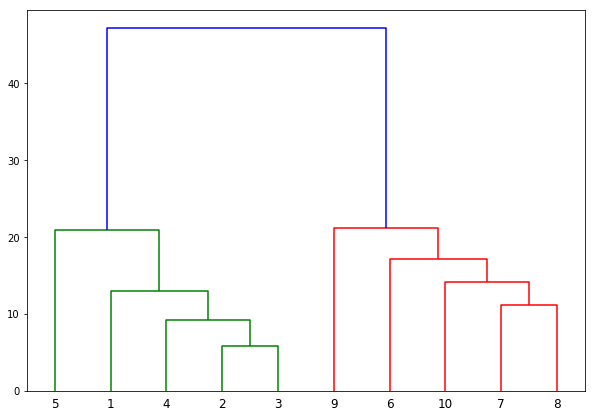

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [8]:
print(linked)

[[ 1.          2.          5.83095189  2.        ]
 [ 3.         10.          9.21954446  3.        ]
 [ 6.          7.         11.18033989  2.        ]
 [ 0.         11.         13.          4.        ]
 [ 9.         12.         14.2126704   3.        ]
 [ 5.         14.         17.20465053  4.        ]
 [ 4.         13.         20.88061302  5.        ]
 [ 8.         15.         21.21320344  5.        ]
 [16.         17.         47.16990566 10.        ]]
